In [94]:
# Create matrix1
matrix1 <- matrix(c(7,2,9,4,12,13), nrow = 2, ncol = 3)

# Create matrix2
matrix2 <- matrix(c(1,2,3,7,8,9,12,13,14,19,20,21), nrow = 3, ncol = 4)

# Create matrices
matrix1
matrix2

# Multiplying matrices
print(matrix1 %*% matrix2)

7,9,12
2,4,13


1,7,12,19
2,8,13,20
3,9,14,21


     [,1] [,2] [,3] [,4]
[1,]   61  229  369  565
[2,]   49  163  258  391


In [95]:
#Q2
# Import the data
df <- read.csv(file = 'C:/Users/chane/Desktop/GW/Subjects/Fall 2021/STAT 1129/Projects/amazon-orders.csv',stringsAsFactors = FALSE)

In [96]:
mydata = subset(df,select = c("Order.Date","Total.Charged"))
head(mydata)

Order.Date,Total.Charged
08/22/19,$36.95
08/22/19,$17.83
08/22/19,$32.40
08/30/19,$44.29
09/06/19,$12.29
09/06/19,$30.18


In [97]:
#remove dollar signs
mydata$Total.Charged = as.numeric(gsub("\\$", "", mydata$Total.Charged))
head(mydata)

Order.Date,Total.Charged
08/22/19,36.95
08/22/19,17.83
08/22/19,32.40
08/30/19,44.29
09/06/19,12.29
09/06/19,30.18


In [98]:
summary(mydata)

  Order.Date        Total.Charged   
 Length:99          Min.   :  0.00  
 Class :character   1st Qu.: 14.00  
 Mode  :character   Median : 24.02  
                    Mean   : 31.42  
                    3rd Qu.: 39.94  
                    Max.   :136.74  

In [ ]:
install.packages("dplyr")                           # Install dplyr package
library("dplyr")                                    # Load dplyr

In [99]:
# Create a new data.frame with the newly formatted date field
mydata <- mydata %>%
  mutate(Date = as.Date(Order.Date, format = "%m/%d/%y"))

head(mydata)

Order.Date,Total.Charged,Date
08/22/19,36.95,2019-08-22
08/22/19,17.83,2019-08-22
08/22/19,32.40,2019-08-22
08/30/19,44.29,2019-08-30
09/06/19,12.29,2019-09-06
09/06/19,30.18,2019-09-06


In [100]:
# add a month column to data.frame
mydata <- mydata %>%
  mutate(month = month(Date))

# add a year column to data.frame
mydata <- mydata %>%
  mutate(year = year(Date))

head(mydata)

Order.Date,Total.Charged,Date,month,year
08/22/19,36.95,2019-08-22,8,2019
08/22/19,17.83,2019-08-22,8,2019
08/22/19,32.40,2019-08-22,8,2019
08/30/19,44.29,2019-08-30,8,2019
09/06/19,12.29,2019-09-06,9,2019
09/06/19,30.18,2019-09-06,9,2019


In [101]:
# calculate the sum amount for each month and year
mydata_month <- mydata %>%
  group_by(year,month) %>%
  summarize(amount = sum(Total.Charged))

mydata_month

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


year,month,amount
2019,8,131.47
2019,9,610.16
2019,10,306.16
2019,11,22.23
2020,1,155.25
2020,2,15.89
2020,4,170.84
2020,8,492.00
2020,9,124.48
2020,10,102.79


In [ ]:
install.packages("ggplot2") 


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



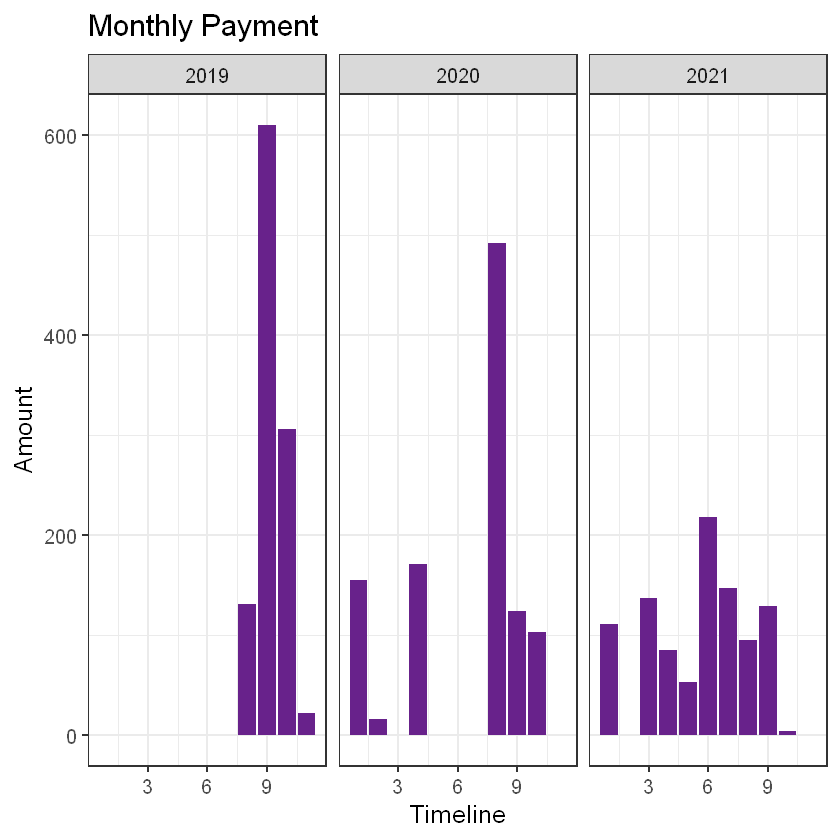

In [93]:
# Load ggplot2
library(ggplot2)

# plot
mydata_month %>%
  ggplot(aes(x = month, y = amount)) +
      geom_bar(stat = "identity", fill = "darkorchid4") +
  facet_wrap(~ year, ncol = 3) +
      labs(title = "Monthly Payment",
           y = "Amount",
           x = "Timeline") + theme_bw(base_size = 15)
